# Poisson Confidence Intervals

Example: You observe 9 events (bkg = 0), what is the symmetric confidence interval at 90% CL ?

In [1]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

def PoissonPDFS(k, mu):
    return poisson.pmf(k, mu)


n_obs = 9
CL = 0.90
prob_left = (1.-CL)/2.
prob_right = (1.-CL)/2.

limits = "(i.e. left = " + "{:.2f}".format(prob_left) + " and right =" + "{:.2f}".format(prob_right) +")"
print ("Read vertically the Confidence Belt for Nobs = ", n_obs, "for a CL =",CL, "%", limits)


max_obs = 20
k = np.arange(0, max_obs, 1)

# Compute left boundary
Signal_left = 0
s = 0
scan_step = 0.01
ck = True
while (s < 2000) and (ck):
    Signal = s * scan_step
    # print ("\nSignal = ", Signal)

    Nobs = poisson.pmf(k, Signal)

    sum = 0
    for i in range(n_obs): # range stops at n_obs -1
        sum+=Nobs[i]
        # print(i, sum)
    
    if (sum < 1-prob_left):
        ck = False
        # print (Signal, sum)
        Signal_left = Signal

    s+=1

# Compute right boundary
Signal_right = 0
s = 0
scan_step = 0.01
ck = True
while (s < 2000) and (ck):
    Signal = s * scan_step
    # print ("\nSignal = ", Signal)

    Nobs = poisson.pmf(k, Signal)

    sum = 0
    for i in range(n_obs+1): # range stops at n_obs+1 -1
        sum+=Nobs[i]
        # print(i, sum)
    
    if (sum < prob_left):
        ck = False
        # print (Signal, sum)
        Signal_right = Signal

    s+=1
    
print ("Confidence Interval = [", Signal_left, ",", Signal_right, "]" )




Read vertically the Confidence Belt for Nobs =  9 for a CL = 0.9 % (i.e. left = 0.05 and right =0.05)
Confidence Interval = [ 4.7 , 15.71 ]


# Build horizontally the Poisson Confidence Belts

Build horizontally the Confidence Belt for a CL = 0.9 % (i.e. left = 0.05 and right =0.05)


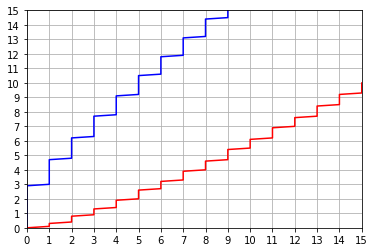

In [2]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

def PoissonPDFS(k, mu):
    return poisson.pmf(k, mu)

Background = 0

CL = 0.90
prob_left = (1.-CL)/2.
prob_right = (1.-CL)/2.


limits = "(i.e. left = " + "{:.2f}".format(prob_left) + " and right =" + "{:.2f}".format(prob_right) +")"
print ("Build horizontally the Confidence Belt for a CL =",CL, "%", limits)

sigs    = [] # array to collect the scanned signals
lbounds = [] # array to collect the left bounds
rbounds = [] # array to collect the right bounds

max_obs = 100
k = np.arange(0, max_obs, 1)

left_bound = 0
right_bound = 0
s = 0

scan_step = 0.1
for s in range(1000):

    Signal = s * scan_step 
    # print ("\nSignal = ", Signal)

    k = np.arange(0, max_obs, 1)
    Nobs = poisson.pmf(k, Signal+ Background)
    
    # left bound
    i = 0
    pl = 0
    while (pl < prob_left) and (i < max_obs):
        # print(i, Nobs[i], pl)
        pl += Nobs[i]
        i += 1                
    if (i < max_obs): 
        # print ("prob left", i-1, pl-Nobs[i-1])
        left_bound = i-1 # pl-Nobs[i-1]

    # right bound
    i = 0
    pr = 0
    while (pr < 1-prob_right) and (i < max_obs):
        # print(i, Nobs[i], pr)
        pr += Nobs[i]
        i += 1                
    if (i < max_obs): 
        # print ("prob right", i, pr-Nobs[i])
        right_bound = i-1 # pr-Nobs[i]
    
    # sigstring = "Signal = {:.2f}".format(Signal) 
    # print (sigstring, "Bounds = [", left_bound, ",", right_bound, "]")

    sigs.append(Signal)
    lbounds.append(left_bound)
    rbounds.append(right_bound)

# print (lbounds,"\n")
# print (rbounds,"\n")
# print (sigs)
import matplotlib.pyplot as plt
plt.plot(lbounds,sigs, 'b-')
plt.plot(rbounds,sigs, 'r-')
plt.axis([0, 15, 0, 15])
# plt.axis([6,10, 0, 16])
#plt.axis([8,11, 15, 16])
plt.xticks(np.arange(0,16, 1.0))
plt.yticks(np.arange(0,16, 1.0))
plt.grid()
plt.show()

# Build horizontally the Poisson one sided Confidence Intervals (left/right i.e. upper/lower)

Build horizontally the Confidence Belt for a CL = 0.9 % (i.e. left = 0.10 and right =0.10)


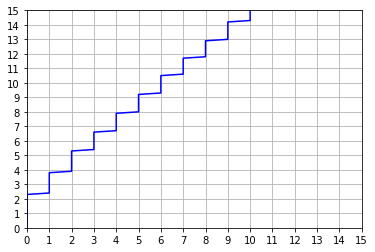

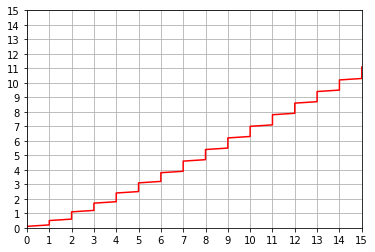

In [3]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

def PoissonPDFS(k, mu):
    return poisson.pmf(k, mu)

Background = 0

CL = 0.90
prob_left = (1.-CL)
prob_right = (1.-CL)


limits = "(i.e. left = " + "{:.2f}".format(prob_left) + " and right =" + "{:.2f}".format(prob_right) +")"
print ("Build horizontally the Confidence Belt for a CL =",CL, "%", limits)

sigs    = [] # array to collect the scanned signals
lbounds = [] # array to collect the left bounds
rbounds = [] # array to collect the right bounds

max_obs = 100
k = np.arange(0, max_obs, 1)

left_bound = 0
right_bound = 0
s = 0

scan_step = 0.1
for s in range(1000):

    Signal = s * scan_step 
    # print ("\nSignal = ", Signal)

    k = np.arange(0, max_obs, 1)
    Nobs = poisson.pmf(k, Signal+ Background)
    
    # left bound
    i = 0
    pl = 0
    while (pl < prob_left) and (i < max_obs):
        # print(i, Nobs[i], pl)
        pl += Nobs[i]
        i += 1                
    if (i < max_obs): 
        # print ("prob left", i-1, pl-Nobs[i-1])
        left_bound = i-1 # pl-Nobs[i-1]

    # right bound
    i = 0
    pr = 0
    while (pr < 1-prob_right) and (i < max_obs):
        # print(i, Nobs[i], pr)
        pr += Nobs[i]
        i += 1                
    if (i < max_obs): 
        # print ("prob right", i, pr-Nobs[i])
        right_bound = i-1 # pr-Nobs[i]
    
    # sigstring = "Signal = {:.2f}".format(Signal) 
    # print (sigstring, "Bounds = [", left_bound, ",", right_bound, "]")

    sigs.append(Signal)
    lbounds.append(left_bound)
    rbounds.append(right_bound)

# print (lbounds,"\n")
# print (rbounds,"\n")
# print (sigs)
import matplotlib.pyplot as plt
plt.plot(lbounds,sigs, 'b-')
plt.axis([0, 15, 0, 15])
# plt.axis([6,10, 0, 16])
#plt.axis([8,11, 15, 16])
plt.xticks(np.arange(0,16, 1.0))
plt.yticks(np.arange(0,16, 1.0))
plt.grid()
plt.show()

plt.plot(rbounds,sigs, 'r-')
plt.axis([0, 15, 0, 15])
# plt.axis([6,10, 0, 16])
#plt.axis([8,11, 15, 16])
plt.xticks(np.arange(0,16, 1.0))
plt.yticks(np.arange(0,16, 1.0))
plt.grid()
plt.show()